In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/oqmd-dataset/oqmd_data.xlsx
/kaggle/input/featured-oqmd-dataset/y_EF (1).csv
/kaggle/input/featured-oqmd-dataset/pre_EF_data(2).csv
/kaggle/input/after-ef-prediction-dataset/y_eg.csv
/kaggle/input/after-ef-prediction-dataset/pre_eg_data_0633.csv


In [40]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# %matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [43]:
X_og=pd.read_csv('/kaggle/input/featured-oqmd-dataset/pre_EF_data(2).csv')
y_og=pd.read_csv('/kaggle/input/featured-oqmd-dataset/y_EF (1).csv')

In [44]:
df = pd.concat([X_og, y_og], axis=1)

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

X = df.drop(columns = ['Ef'],axis = 1)
y = df['Ef']

In [45]:
X.columns

Index(['cs1', 'z_mean', 'z_std', 'grp_mean', 'grp_std', 'row_mean', 'row_std',
       'pet_mn_mean', 'pet_mn_std', 'mn_mean', 'mn_std', 'atom_rad_mean',
       'atom_rad_std', 'cal_atom_rad_mean', 'cal_atom_rad_std', 'cov_rad_mean',
       'cov_rad_std', 'vdw_mean', 'vdw_std', 'x_mean', 'x_std', 'val_mean',
       'val_std', 'ea_mean', 'ea_std', 'ie_mean', 'ie_std', 'p_mean', 'p_std',
       'atom_mass_mean', 'atom_mass_std', 'mol_vol_mean', 'mol_vol_std', 'vol',
       'bp_mean', 'bp_std', 'rho_mean', 'rho_std', 'mp_mean', 'mp_std',
       'k_mean', 'k_std', 'heat_fus_mean', 'heat_fus_std', 'heat_vap_mean',
       'heat_vap_std', 'spec_heat_mean', 'spec_heat_std', 'gtf', 'of', 'prop',
       'res_sg', 'res_name'],
      dtype='object')

In [46]:
data_list = [
    "rho_std",
    "rho_mean",
    "val_mean",
    "mol_vol_std",
    "ea_mean",
    "bp_std",
    "x_mean",
    "x_std",
    "cal_atom_rad_mean",
    "z_mean",
    "z_std",
    "p_mean",
    "vdw_mean",
    "k_mean",
    "k_std",
    "ea_std",
    "atom_mass_std",
    "atom_mass_mean",
    "heat_fus_mean",
    "mp_mean",
    "heat_vap_mean"
]

X.drop(data_list, axis=1, inplace=True)


In [47]:
X_og.drop(data_list, axis=1, inplace=True)

In [48]:
X.columns

Index(['cs1', 'grp_mean', 'grp_std', 'row_mean', 'row_std', 'pet_mn_mean',
       'pet_mn_std', 'mn_mean', 'mn_std', 'atom_rad_mean', 'atom_rad_std',
       'cal_atom_rad_std', 'cov_rad_mean', 'cov_rad_std', 'vdw_std', 'val_std',
       'ie_mean', 'ie_std', 'p_std', 'mol_vol_mean', 'vol', 'bp_mean',
       'mp_std', 'heat_fus_std', 'heat_vap_std', 'spec_heat_mean',
       'spec_heat_std', 'gtf', 'of', 'prop', 'res_sg', 'res_name'],
      dtype='object')

In [49]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
import re
import random
import os

In [52]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=9)


In [53]:
y

0       -1.819495
1       -0.542763
2       -3.404857
3       -0.072441
4       -1.337732
           ...   
16318   -2.279531
16319   -3.325537
16320   -0.854954
16321   -2.374295
16322   -3.561163
Name: Ef, Length: 16323, dtype: float64

In [54]:
# PREDICTION EXPERIMENT 1: Support Vector Regression (SVM)
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regr = make_pipeline(StandardScaler(), SVR(C=100.0, epsilon=0.001, gamma='auto', kernel='rbf'))
# regr = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [60]:
# Evaluation
print('R-square: %.4f' % (r2_score(y_test, y_pred)*100))
print("Mean squared error: %.4f"% mean_squared_error(y_test, y_pred))
print("RMSE test: %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean absolute error: %.4f"% mean_absolute_error(y_test, y_pred))

R-square: 79.5662
Mean squared error: 0.1813
RMSE test: 0.4257
Mean absolute error: 0.2353


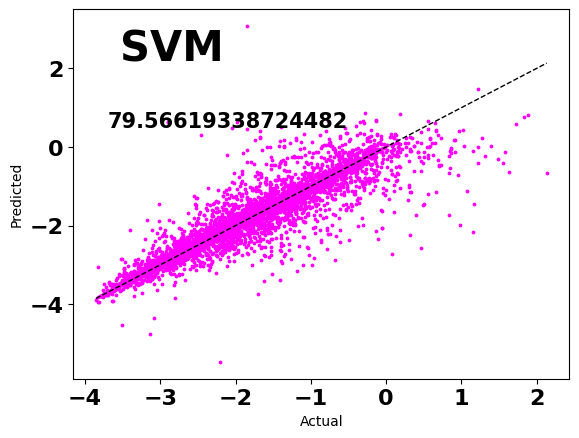

In [61]:
# PLOT REGRESSION FITTING

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, color='magenta', s=3)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

ax.text(0.095, 0.95, 'SVM',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='black', fontsize=30, fontweight='bold')

ax.text(-3.7, 0.5, r2_score(y_test, y_pred)*100, fontsize=15, fontweight='bold')
plt.show()


In [62]:
y_pred

array([-1.73723916, -2.13339519, -1.68061606, ...,  0.17106594,
       -2.15884113, -0.75823377])

In [63]:
Ef_pred=regr.predict(X_og)

In [64]:
X_eg=pd.read_csv('/kaggle/input/after-ef-prediction-dataset/pre_eg_data_0633.csv')
y_eg=pd.read_csv('/kaggle/input/after-ef-prediction-dataset/y_eg.csv')

In [65]:
X_eg.columns

Index(['cs1', 'z_mean', 'z_std', 'grp_mean', 'grp_std', 'row_mean', 'row_std',
       'pet_mn_mean', 'pet_mn_std', 'mn_mean', 'mn_std', 'av_ionrad_mean',
       'av_ionrad_std', 'atom_rad_mean', 'atom_rad_std', 'cal_atom_rad_mean',
       'cal_atom_rad_std', 'cov_rad_mean', 'cov_rad_std', 'vdw_mean',
       'vdw_std', 'x_mean', 'x_std', 'val_mean', 'val_std', 'ea_mean',
       'ea_std', 'ie_mean', 'ie_std', 'p_mean', 'p_std', 'atom_mass_mean',
       'atom_mass_std', 'mol_vol_mean', 'mol_vol_std', 'vol', 'bp_mean',
       'bp_std', 'rho_mean', 'rho_std', 'mp_mean', 'mp_std', 'k_mean', 'k_std',
       'heat_fus_mean', 'heat_fus_std', 'heat_vap_mean', 'heat_vap_std',
       'spec_heat_mean', 'spec_heat_std', 'gtf', 'of', 'prop', 'res_sg',
       'res_name', 'Ef'],
      dtype='object')

In [66]:
X_eg.drop(['Ef'], axis=1, inplace=True)

In [67]:
X_eg.columns

Index(['cs1', 'z_mean', 'z_std', 'grp_mean', 'grp_std', 'row_mean', 'row_std',
       'pet_mn_mean', 'pet_mn_std', 'mn_mean', 'mn_std', 'av_ionrad_mean',
       'av_ionrad_std', 'atom_rad_mean', 'atom_rad_std', 'cal_atom_rad_mean',
       'cal_atom_rad_std', 'cov_rad_mean', 'cov_rad_std', 'vdw_mean',
       'vdw_std', 'x_mean', 'x_std', 'val_mean', 'val_std', 'ea_mean',
       'ea_std', 'ie_mean', 'ie_std', 'p_mean', 'p_std', 'atom_mass_mean',
       'atom_mass_std', 'mol_vol_mean', 'mol_vol_std', 'vol', 'bp_mean',
       'bp_std', 'rho_mean', 'rho_std', 'mp_mean', 'mp_std', 'k_mean', 'k_std',
       'heat_fus_mean', 'heat_fus_std', 'heat_vap_mean', 'heat_vap_std',
       'spec_heat_mean', 'spec_heat_std', 'gtf', 'of', 'prop', 'res_sg',
       'res_name'],
      dtype='object')

In [68]:
X_eg['Ef']=Ef_pred

In [69]:
X_eg.columns

Index(['cs1', 'z_mean', 'z_std', 'grp_mean', 'grp_std', 'row_mean', 'row_std',
       'pet_mn_mean', 'pet_mn_std', 'mn_mean', 'mn_std', 'av_ionrad_mean',
       'av_ionrad_std', 'atom_rad_mean', 'atom_rad_std', 'cal_atom_rad_mean',
       'cal_atom_rad_std', 'cov_rad_mean', 'cov_rad_std', 'vdw_mean',
       'vdw_std', 'x_mean', 'x_std', 'val_mean', 'val_std', 'ea_mean',
       'ea_std', 'ie_mean', 'ie_std', 'p_mean', 'p_std', 'atom_mass_mean',
       'atom_mass_std', 'mol_vol_mean', 'mol_vol_std', 'vol', 'bp_mean',
       'bp_std', 'rho_mean', 'rho_std', 'mp_mean', 'mp_std', 'k_mean', 'k_std',
       'heat_fus_mean', 'heat_fus_std', 'heat_vap_mean', 'heat_vap_std',
       'spec_heat_mean', 'spec_heat_std', 'gtf', 'of', 'prop', 'res_sg',
       'res_name', 'Ef'],
      dtype='object')

In [70]:
X_eg.to_csv('my_X_eg.csv', index=False)

In [71]:
dataset = [
    "Ef",
    "prop",
    "ea_std",
    "gtf",
    "x_std",
    "ie_std",
    "vol",
    "cs1",
    "spec_heat_std",
    "of",
    "ie_mean",
    "grp_std",
    "row_std",
    "atom_mass_mean",
    "z_mean",
    "grp_mean",
    "spec_heat_mean",
    "x_mean",
    "cov_rad_mean",
    "cal_atom_rad_mean",
    "ea_mean",
    "atom_rad_mean",
    "val_mean",
    "row_mean",
    "mn_mean",
    "cov_rad_std",
    "cal_atom_rad_std",
    "atom_rad_std",
    "pet_mn_std",
    "heat_vap_std",
    "heat_fus_mean"
]


In [72]:
X_eg.drop(dataset, axis=1, inplace=True)

In [73]:
X_train, X_test, y_train, y_test = train_test_split( X_eg, y_eg, test_size=0.3, random_state=9)

In [74]:
# PREDICTION EXPERIMENT 1: Support Vector Regression (SVM)
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regr = make_pipeline(StandardScaler(), SVR(C=100.0, epsilon=0.001, gamma='auto', kernel='rbf'))
# regr = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
# Evaluation
print('R-square: %.4f' % (r2_score(y_test, y_pred)*100))
print("Mean squared error: %.4f"% mean_squared_error(y_test, y_pred))
print("RMSE test: %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean absolute error: %.4f"% mean_absolute_error(y_test, y_pred))

R-square: 62.5022
Mean squared error: 0.5998
RMSE test: 0.7745
Mean absolute error: 0.3923


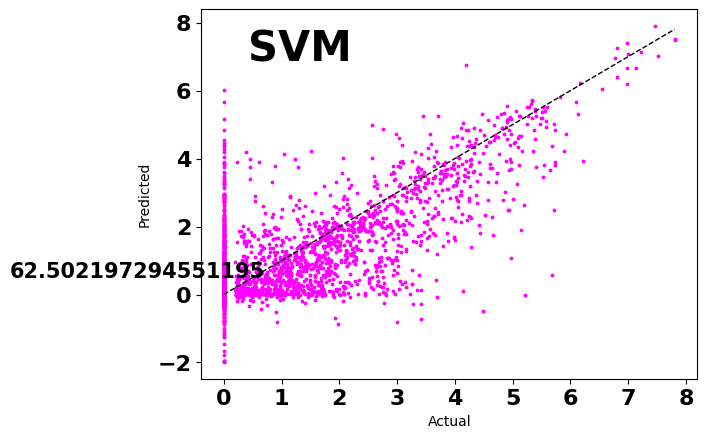

In [76]:
# PLOT REGRESSION FITTING

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, color='magenta', s=3)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

ax.text(0.095, 0.95, 'SVM',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='black', fontsize=30, fontweight='bold')

ax.text(-3.7, 0.5, r2_score(y_test, y_pred)*100, fontsize=15, fontweight='bold')
plt.show()